# User Guide

### 0. Packages

In [1]:
# Support Packages
import geopandas as gpd
import os
import rioxarray as rxr
import xarray as xr
import xugrid as xu

# Resilient Plotter Class
from resilientplotterclass import rpclass

### 1. Guidelines

In [2]:
# File path guidelines
file_path_gls = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'data', 'example_guidelines.json')

# Set guidelines
rpc = rpclass(file_path_gls, cartopy=True) # Cartopy explained in Section 7

# Set guidelines
rpc.set_guidelines(file_path_gls)

# Get guidelines
gls = rpc.get_guidelines()

# Get guideline options
print('\33[1mGuidelines:\33[0m')
for key  in rpc.get_guideline_options():
    print('- {}: {}'.format(key, rpc.get_guideline_options()[key]))

Guidelines:
- data_type: ['wave_period', 'sediment_transport', 'morphology', 'bedforms', 'wave_direction', 'flow_velocity', 'default', 'sediment_concentration', 'flow_direction', 'sediment_particle_size', 'bathymetry', 'wave_height']
- geometry_type: ['aoi', 'grid']
- map_type: ['osm', 'satellite']
- general: ['crs', 'cartopy_features', 'vrl', 'bounds', 'xy_unit']
- extent_type: ['aoi', 'aoi_tight']
- metadata: ['title', 'authors', 'date']


### 2. Load Data

In [3]:
# File paths
file_path_nc = r'p:\archivedprojects\11209197-virtualclimatelab\01_data\Delft3D\wadsea_0000_map.nc'
file_path_shp = r'p:\archivedprojects\11209197-virtualclimatelab\01_data\Extent\afmetingen_krappebox.shp'

# Read unstructured data
uds = xu.open_dataset(file_path_nc).isel(time=10, nSedSus=0, nSedTot=0, Two=0, max_nmesh2d_face_nodes=0).squeeze().drop('time')

# Set crs to unstructured data (IMPORTANT)
uds.grid.set_crs('EPSG:28992')

# Convert to structured data
bounds = (128000, 580000, 152000, 600000)
res = 100
da_mor_bl = rpc.to_structured(uds['mesh2d_mor_bl'], resolution=res, bounds=bounds)
da_ucx = rpc.to_structured(uds['mesh2d_ucx'], resolution=res, bounds=bounds)
da_ucy = rpc.to_structured(uds['mesh2d_ucy'], resolution=res, bounds=bounds)
da_ucmag = rpc.to_structured(uds['mesh2d_ucmag'], resolution=res, bounds=bounds)
ds = xr.Dataset({'mor_bl': da_mor_bl, 'ucx': da_ucx, 'ucy': da_ucy, 'ucmag': da_ucmag})

# Read geometry
gdf = gpd.read_file(file_path_shp)

### 3. General plot methods

#### 2.1 Structured data

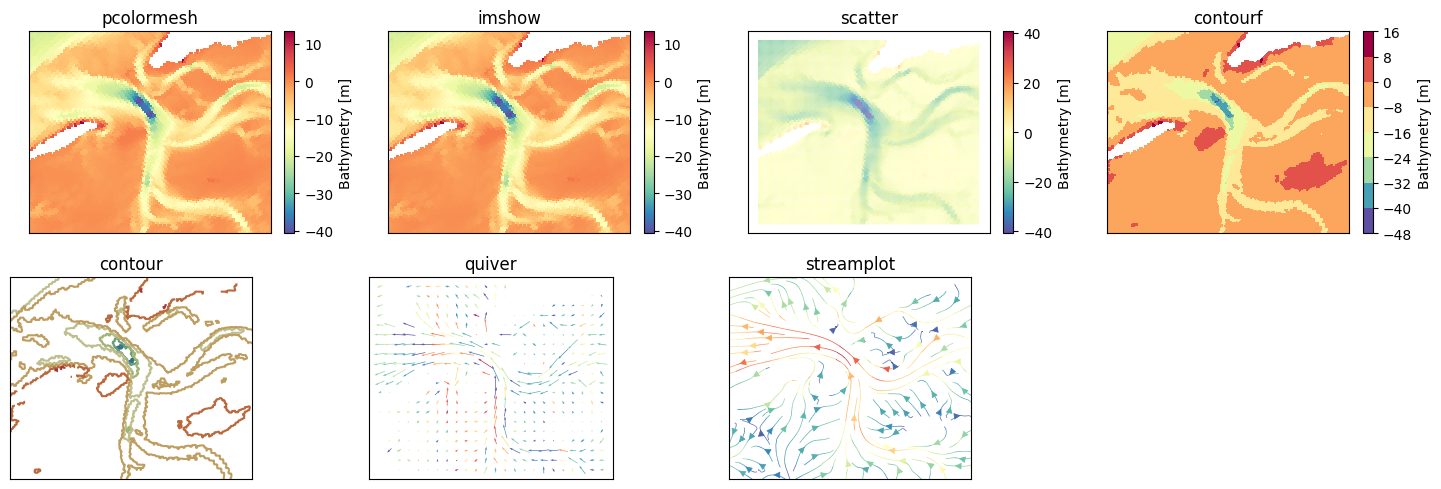

In [4]:
# Create figure
fig, axs = rpc.subplots(2, 4, figsize=(15, 5), layout='tight')
axs = axs.flatten()

# Plot data

rpc.pcolormesh(ds['mor_bl'],    data_type='bathymetry', ax=axs[0])
rpc.imshow(    ds['mor_bl'],    data_type='bathymetry', ax=axs[1])
rpc.scatter(   ds,              data_type='bathymetry', ax=axs[2], x='x', y='y', hue='mor_bl', s=0.5)
rpc.contourf(  ds['mor_bl'],    data_type='bathymetry', ax=axs[3])
rpc.contour(   ds['mor_bl'],    data_type='bathymetry', ax=axs[4])
rpc.quiver(    ds,                                      ax=axs[5], skip=10, x='x', y='y', u='ucx', v='ucy', hue='ucmag', cmap='Spectral_r', add_guide=False)
rpc.streamplot(ds,                                      ax=axs[6], x='x', y='y', u='ucx', v='ucy', hue='ucmag', cmap='Spectral_r', linewidth=0.5, add_guide=False)

# Format figure
[ax.set_xlabel('') for ax in axs]
[ax.set_ylabel('') for ax in axs]
[ax.set_xticks([]) for ax in axs]
[ax.set_yticks([]) for ax in axs]
[ax.set_title(title) for ax, title in zip(axs, ['pcolormesh', 'imshow', 'scatter', 'contourf', 'contour', 'quiver', 'streamplot'])]
axs[7].remove()

#### 2.2 Unstructured data

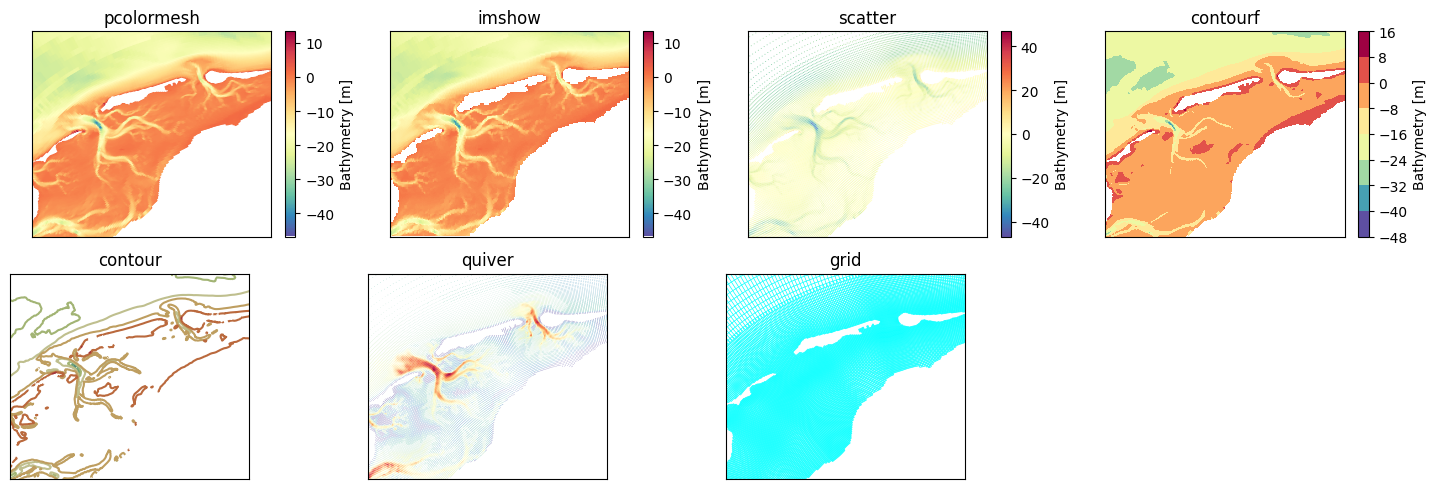

In [5]:
# Create figure
fig, axs = rpc.subplots(2, 4, figsize=(15, 5), layout='tight')
axs = axs.flatten()

# Plot data
rpc.pcolormesh(uds['mesh2d_mor_bl'], data_type='bathymetry', extent_type='aoi', ax=axs[0])
rpc.imshow(    uds['mesh2d_mor_bl'], data_type='bathymetry', extent_type='aoi', ax=axs[1])
rpc.scatter(   uds['mesh2d_mor_bl'], data_type='bathymetry', extent_type='aoi', ax=axs[2], s=0.5)
rpc.contourf(  uds['mesh2d_mor_bl'], data_type='bathymetry', extent_type='aoi', ax=axs[3])
rpc.contour(   uds['mesh2d_mor_bl'], data_type='bathymetry', extent_type='aoi', ax=axs[4])
rpc.quiver(    uds,                                          extent_type='aoi', ax=axs[5], x='mesh2d_face_x', y='mesh2d_face_y', u='mesh2d_ucx', v='mesh2d_ucy', hue='mesh2d_ucmag', cmap='Spectral_r', add_guide=False)
rpc.grid(      uds,                                          extent_type='aoi', ax=axs[6])

# Format figure
_ = [ax.set_xlabel('') for ax in axs]
_ = [ax.set_ylabel('') for ax in axs]
_ = [ax.set_xticks([]) for ax in axs]
_ = [ax.set_yticks([]) for ax in axs]
_ = [ax.set_title(title) for ax, title in zip(axs, ['pcolormesh', 'imshow', 'scatter', 'contourf', 'contour', 'quiver', 'grid'])]
axs[7].remove()

#### 2.3 Geospatial data

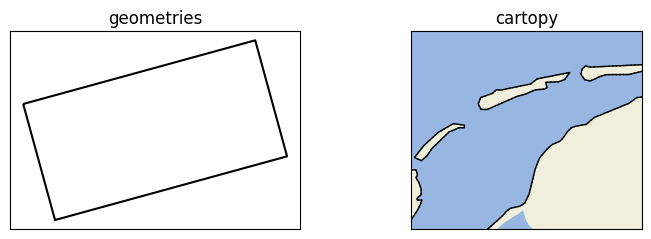

In [6]:
# Create figure
fig, axs = rpc.subplots(1, 4, figsize=(15, 2.5), layout='tight')
axs = axs.flatten()

# Plot geometry
rpc.geometries(gdf,    geometry_type='aoi',                    ax=axs[0])
rpc.cartopy(                                extent_type='aoi', ax=axs[1])

# Format figure
_ = [ax.set_xlabel('') for ax in axs]
_ = [ax.set_ylabel('') for ax in axs]
_ = [ax.set_xticks([]) for ax in axs]
_ = [ax.set_yticks([]) for ax in axs]
_ = [ax.set_title(title) for ax, title in zip(axs, ['geometries', 'cartopy'])]
_ = [ax.remove() for ax in axs[2:]]

#### 2.4 Basemaps

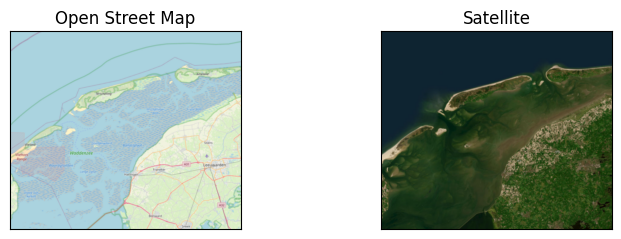

In [7]:
# Create figure
fig, axs = rpc.subplots(1, 4, figsize=(15, 2.5), layout='tight')
axs = axs.flatten()

# Plot geometry
rpc.basemap(extent_type='aoi', map_type='osm',       ax=axs[0])
rpc.basemap(extent_type='aoi', map_type='satellite', ax=axs[1])

# Format figure
_ = [ax.set_xlabel('') for ax in axs]
_ = [ax.set_ylabel('') for ax in axs]
_ = [ax.set_xticks([]) for ax in axs]
_ = [ax.set_yticks([]) for ax in axs]
_ = [ax.set_title(title) for ax, title in zip(axs, ['Open Street Map', 'Satellite'])]
_ = [ax.remove() for ax in axs[2:]]

### 5. Combining general plot components

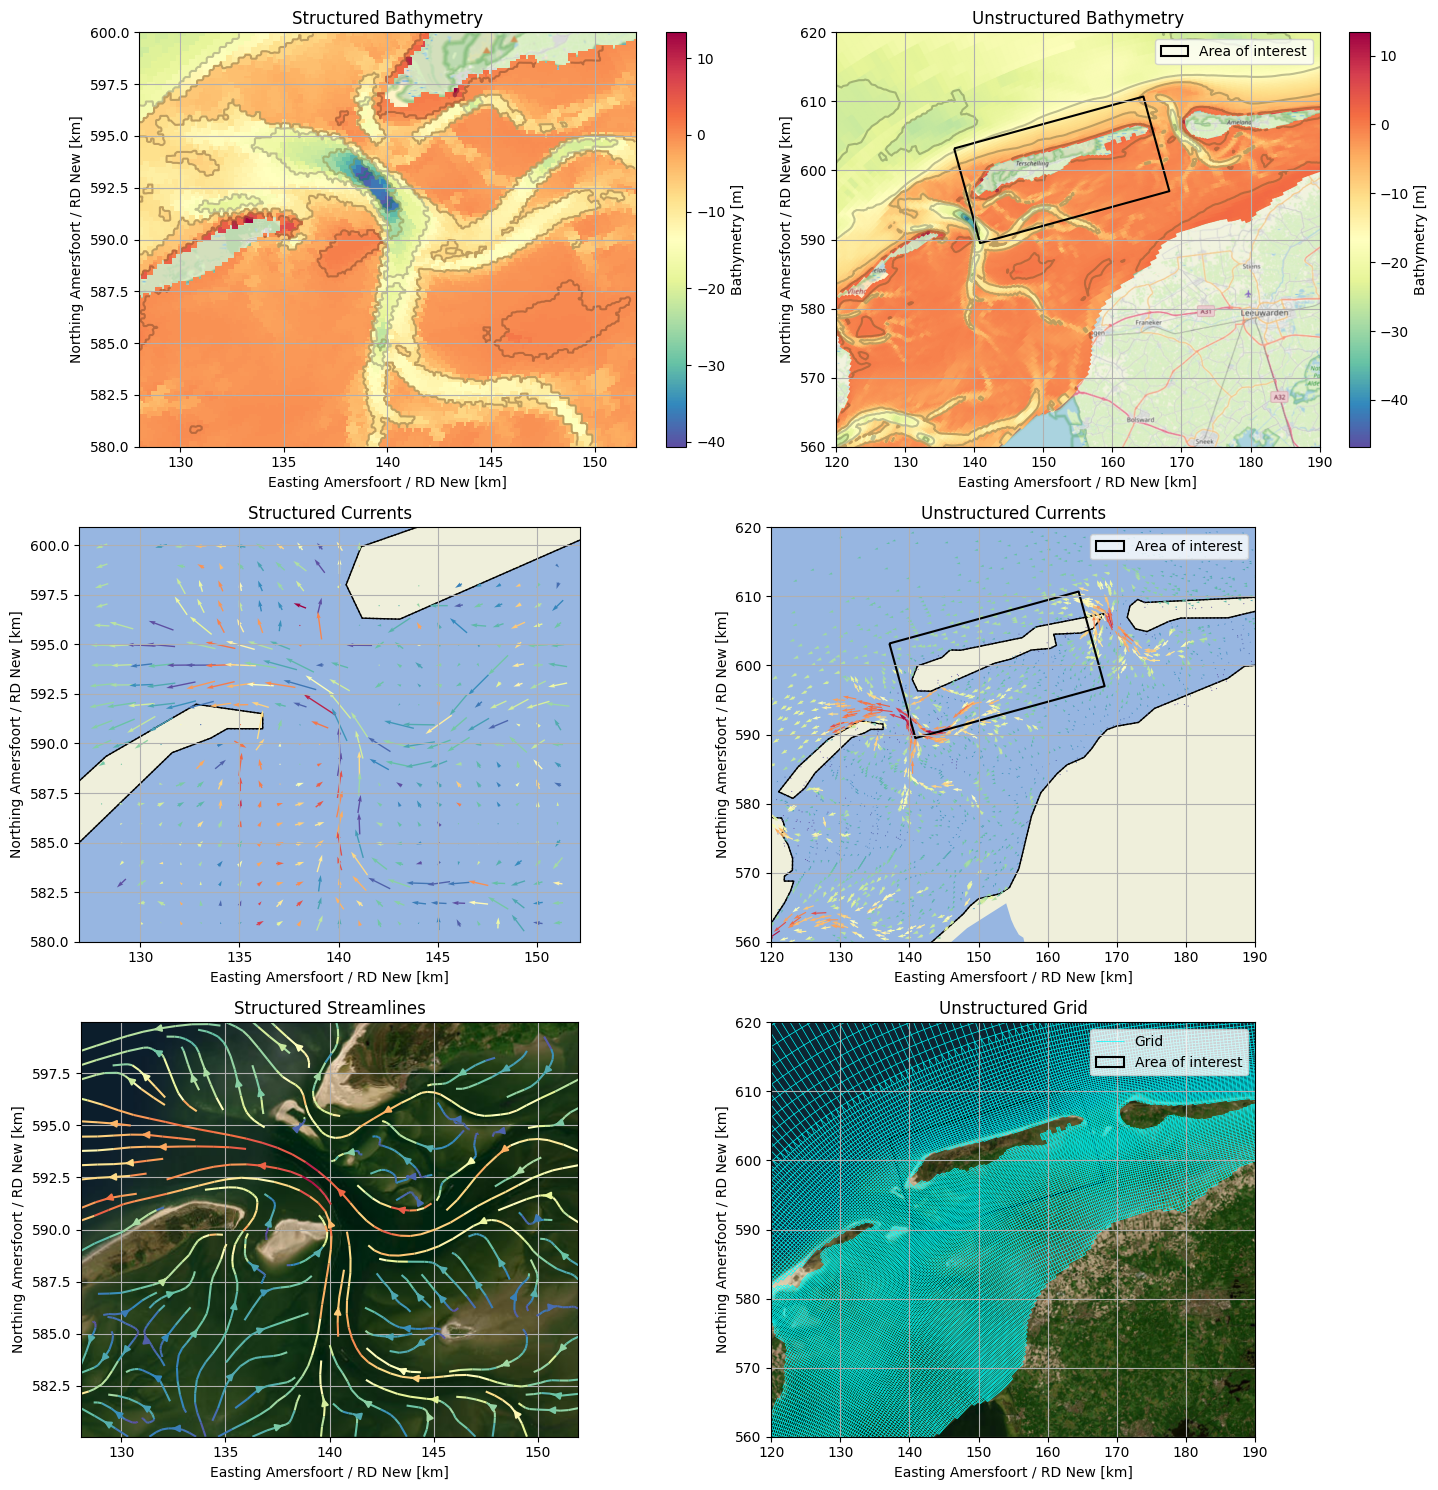

In [8]:
# Create figure
fig, axs = rpc.subplots(3, 2, figsize=(15, 15), layout='tight')
axs = axs.flatten()

# Plot data, geometry and basemaps
rpc.pcolormesh(ds['mor_bl'],         data_type='bathymetry',                    ax=axs[0])
rpc.contour(   ds['mor_bl'],         data_type='bathymetry',                    ax=axs[0])
rpc.basemap(                         map_type='osm',                            ax=axs[0])

rpc.pcolormesh(uds['mesh2d_mor_bl'], data_type='bathymetry',                    ax=axs[1])
rpc.contour(   uds['mesh2d_mor_bl'], data_type='bathymetry',                    ax=axs[1])
rpc.geometries(gdf,                  geometry_type='aoi',                       ax=axs[1])
rpc.basemap(                         map_type='osm'      ,   extent_type='aoi', ax=axs[1])

rpc.quiver(    ds,                                                              ax=axs[2], skip=10, x='x', y='y', u='ucx', v='ucy', hue='ucmag', cmap='Spectral_r', add_guide=False)
rpc.cartopy(                                                                    ax=axs[2])

rpc.quiver(uds.isel(nmesh2d_face=slice(None, None, 11)),                        ax=axs[3], x='mesh2d_face_x', y='mesh2d_face_y', u='mesh2d_ucx', v='mesh2d_ucy', hue='mesh2d_ucmag', cmap='Spectral_r', add_guide=False)
rpc.geometries(gdf,                  geometry_type='aoi',                       ax=axs[3])
rpc.cartopy(                                                 extent_type='aoi', ax=axs[3])

rpc.streamplot(ds,                                                              ax=axs[4], x='x', y='y', u='ucx', v='ucy', hue='ucmag', cmap='Spectral_r', add_guide=False)
rpc.basemap(                         map_type='satellite',                      ax=axs[4])

rpc.grid(      uds['mesh2d_mor_bl'],                                            ax=axs[5])
rpc.basemap(                         map_type='satellite',   extent_type='aoi', ax=axs[5])
rpc.geometries(gdf,                  geometry_type='aoi',                       ax=axs[5])

# Format figure
_ = [ax.set_title(title) for ax, title in zip(axs, ['Structured Bathymetry', 'Unstructured Bathymetry', 'Structured Currents', 'Unstructured Currents', 'Structured Streamlines', 'Unstructured Grid'])]
_ = [ax.legend(loc='upper right') for ax in axs[[1, 3, 5]]]

### 6. General Plot Methods

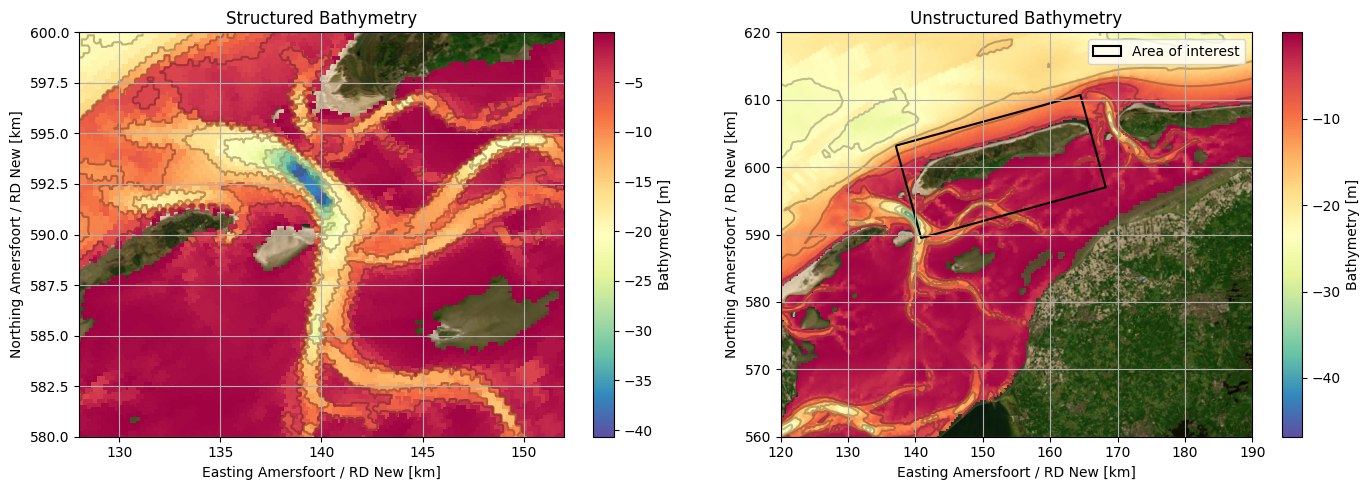

In [9]:
# Create figure
fig, axs = rpc.subplots(1, 2, figsize=(15, 5), layout='tight')

# Plot data
rpc.bathymetry(ds['mor_bl'],                  data_type='bathymetry',                                         ax=axs[0])
rpc.bathymetry(uds['mesh2d_mor_bl'], gdf=gdf, data_type='bathymetry', geometry_type='aoi', extent_type='aoi', ax=axs[1])

# Format figure
_ = [ax.set_title(title) for ax, title in zip(axs, ['Structured Bathymetry', 'Unstructured Bathymetry'])]

### 7. Saving figures

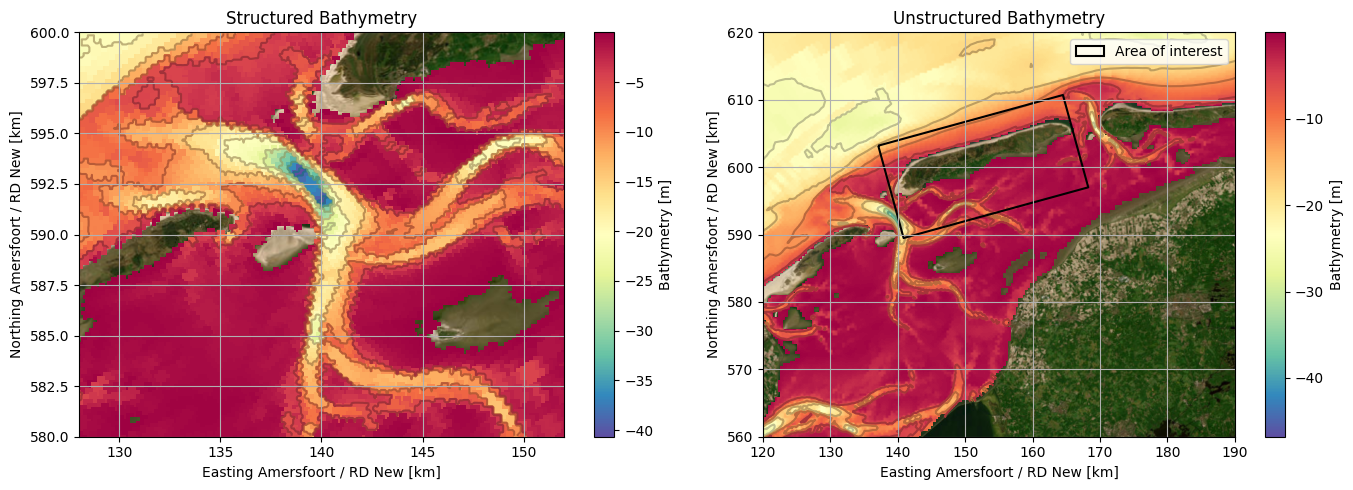

In [10]:
# Create figure
fig, axs = rpc.subplots(1, 2, figsize=(15, 5), layout='tight')

# Plot data
rpc.bathymetry(ds['mor_bl'],                  data_type='bathymetry',                                         ax=axs[0])
rpc.bathymetry(uds['mesh2d_mor_bl'], gdf=gdf, data_type='bathymetry', geometry_type='aoi', extent_type='aoi', ax=axs[1])

# Format figure
_ = [ax.set_title(title) for ax, title in zip(axs, ['Structured Bathymetry', 'Unstructured Bathymetry'])]

# Save figure
rpc.savefig(fig, 'example.png')

# Remove figure
os.remove('example.png')

### 8. Interactive figures

In [11]:
# TODO

### 9. Supporting Methods

#### 9.1 Cartopy

In [12]:
# Set cartopy
rpc.set_cartopy()

# Get cartopy
gdf_cartopy = rpc.get_cartopy()

# Print cartopy
gdf_cartopy

geometry  \
land       MULTIPOLYGON (((111099.184 552628.006, 111884....   
ocean      MULTIPOLYGON (((194478.348 602358.927, 190035....   
lakes      MULTIPOLYGON (((137659.655 552589.199, 148334....   
coastline  MULTILINESTRING ((110953.29 551991.251, 111099...   
states     MULTIPOLYGON (((111099.184 552628.006, 111884....   

                                                      kwargs  
land       {'facecolor': [0.9375, 0.9375, 0.859375], 'edg...  
ocean      {'facecolor': [0.59375, 0.71484375, 0.8828125]...  
lakes      {'facecolor': [0.59375, 0.71484375, 0.8828125]...  
coastline  {'color': 'black', 'linewidth': 1, 'linestyle'...  
states     {'facecolor': 'none', 'edgecolor': 'black', 'l...

#### 9.2 Custom colormaps

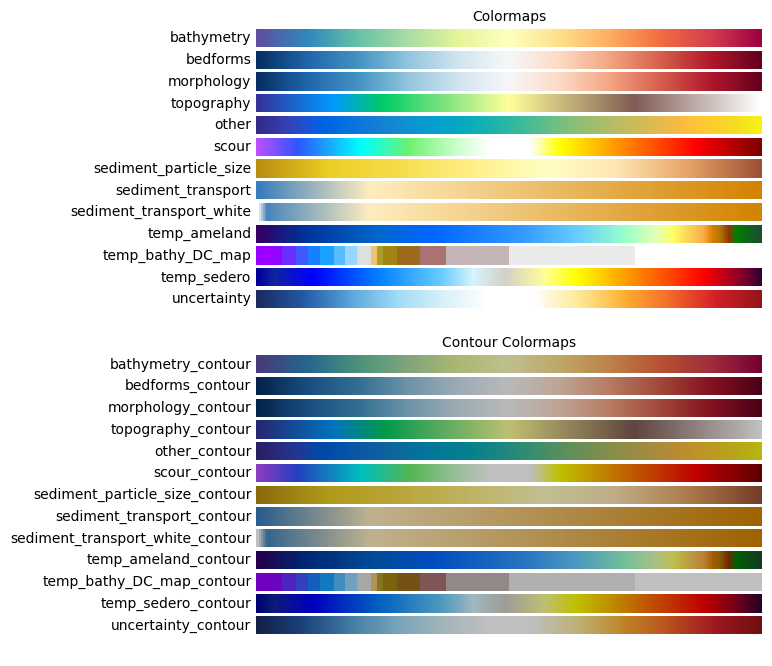

In [13]:
# Custom colormaps
rpc.plot_colormaps()

#### 9.3 Reprojecting data

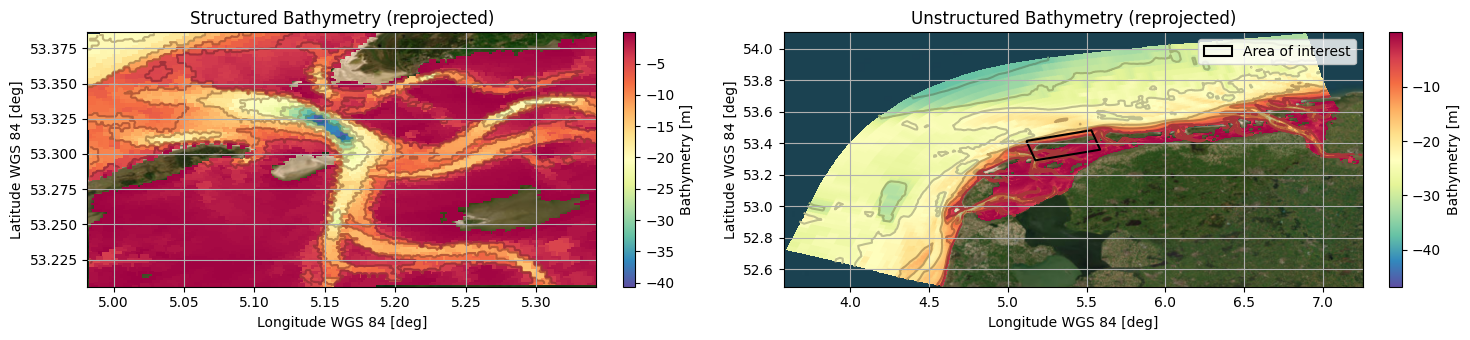

In [14]:
# Reprojecting data
ds_reprojected = rpc.reproject(ds, crs='EPSG:4326')
uds_reprojected = rpc.reproject(uds, crs='EPSG:4326')
gdf_reprojected = rpc.reproject(gdf, crs='EPSG:4326')

# Create figure
fig, axs = rpc.subplots(1, 2, figsize=(15, 3.5), layout='tight')

# Plot data
rpc.bathymetry(ds_reprojected['mor_bl'],                              data_type='bathymetry',                      ax=axs[0])
rpc.bathymetry(uds_reprojected['mesh2d_mor_bl'], gdf=gdf_reprojected, data_type='bathymetry', geometry_type='aoi', ax=axs[1])

# Format figure
_ = [ax.set_title(title) for ax, title in zip(axs, ['Structured Bathymetry (reprojected)', 'Unstructured Bathymetry (reprojected)'])]

#### 7.4 Converting data

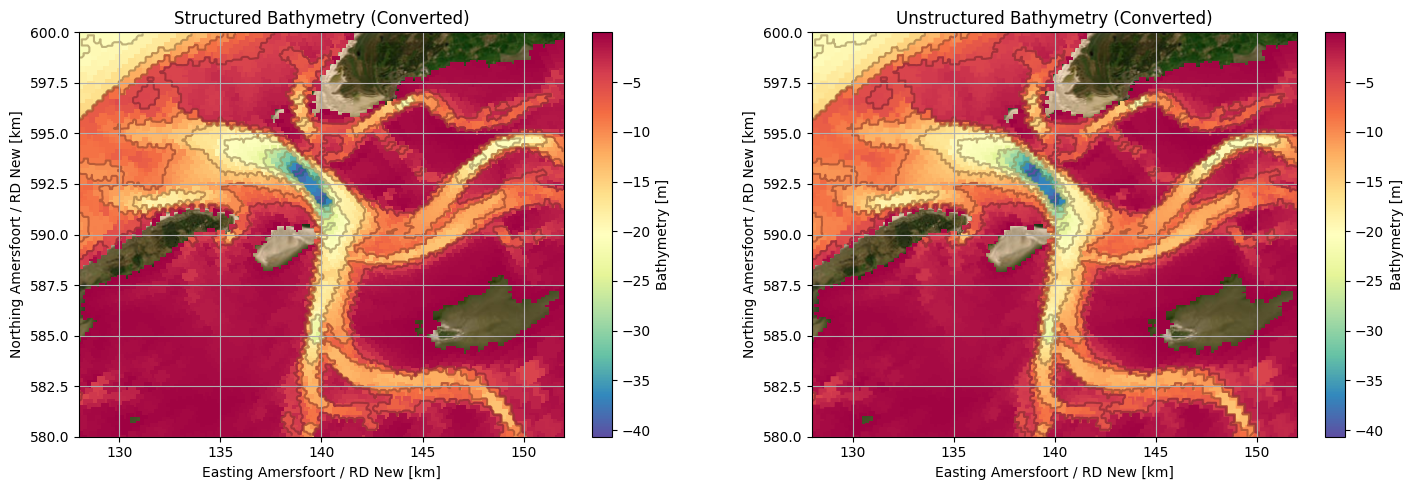

In [15]:
# Converting data
da_converted = rpc.to_structured(uds['mesh2d_mor_bl'], resolution=res, bounds=bounds)
uda_converted = rpc.to_unstructured(ds['mor_bl'])

# Create figure
fig, axs = rpc.subplots(1, 2, figsize=(15, 5), layout='tight')

# Plot data
rpc.bathymetry(da_converted,  data_type='bathymetry', ax=axs[0])
rpc.bathymetry(uda_converted, data_type='bathymetry', ax=axs[1])

# Format figure
_ = [ax.set_title(title) for ax, title in zip(axs, ['Structured Bathymetry (Converted)', 'Unstructured Bathymetry (Converted)'])]